In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
# Import "Disaster Declarations" spreadsheet
disaster_declare = './data/DisasterDeclarationsSummaries.csv'
DD_df = pd.read_csv(disaster_declare, low_memory=False)

# Only include inputs that can be summed or are part of the grouping
DD_df["disasterNumber"] = DD_df["disasterNumber"].astype(str)


In [3]:
DD_df["address"] = DD_df["disasterNumber"] + ', ' + DD_df["state"] + ', ' + DD_df["designatedArea"]

DDa_df = DD_df.loc[:,["incidentType", "fyDeclared", "address"]]
DDa_df

,incidentType,fyDeclared,address
0,Tornado,1953,"4, MI, Statewide"
1,Tornado,1953,"2, TX, Statewide"
2,Flood,1953,"9, TX, Statewide"
3,Fire,1953,"11, NH, Statewide"
4,Tornado,1953,"6, MI, Statewide"
...,...,...,...
51108,Severe Storm(s),2020,"4471, TN, Humphreys (County)"
51109,Hurricane,2020,"4465, NC, Chowan (County)"
51110,Hurricane,2020,"4465, NC, Bladen (County)"
51111,Hurricane,2020,"4468, FL, Broward (County)"


In [4]:

DDa_df = DDa_df.groupby(["incidentType", "fyDeclared"]).count()
# Convert to DataFrame
DDa_df = DDa_df.reset_index()
# Preview DataFrame
incidents_df = DDa_df.rename(columns = {"address": "counties affected"})

incidents_df

,incidentType,fyDeclared,counties affected
0,Chemical,2014,9
1,Coastal Storm,1972,15
2,Coastal Storm,1975,1
3,Coastal Storm,1980,3
4,Coastal Storm,1983,40
...,...,...,...
463,Volcano,1955,1
464,Volcano,1980,47
465,Volcano,1990,1
466,Volcano,2015,1


In [9]:
inc_piv_df = incidents_df.pivot(index = 'fyDeclared', columns = 'incidentType', values = 'counties affected')
inc_piv_df = inc_piv_df.fillna(value = 0)
inc_piv_df.tail(5)


incidentType,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
fyDeclared,,,,,,,,,,,,,,,,,,,,,
2016,0.0,1.0,0.0,0.0,0.0,52.0,0.0,400.0,0.0,0.0,...,0.0,21.0,393.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0
2017,0.0,0.0,3.0,0.0,0.0,90.0,0.0,220.0,0.0,0.0,...,0.0,20.0,257.0,55.0,0.0,45.0,0.0,0.0,0.0,0.0
2018,0.0,3.0,0.0,0.0,0.0,105.0,0.0,185.0,0.0,0.0,...,0.0,0.0,121.0,39.0,0.0,2.0,0.0,0.0,7.0,1.0
2019,0.0,42.0,0.0,0.0,8.0,24.0,0.0,648.0,0.0,0.0,...,0.0,0.0,554.0,0.0,0.0,13.0,0.0,0.0,9.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,14.0,0.0,8.0,0.0,0.0,...,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [11]:
output_data_file = "orig_piv_chart.csv"
inc_piv_df.to_csv(output_data_file, index=False, header=True)

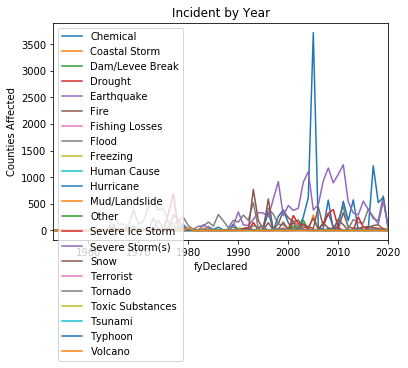

In [8]:
ax = inc_piv_df.plot()
plt.title("Incident by Year")
plt.legend(loc = "upper left")
plt.ylabel("Counties Affected")
fig = ax.get_figure()
fig.savefig('Incident_Type_By_Year.png')

In [28]:
inc_piv_df["Total"] = inc_piv_df.sum(axis=1)
inc_piv_df

#plt.scatter(lat_list, humid_list, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
inc_reset_df = inc_piv_df.reset_index()


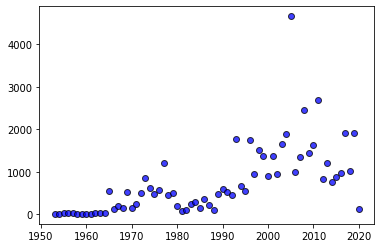

In [29]:
year = inc_reset_df["fyDeclared"]

disasters  = inc_reset_df["Total"]
plt.scatter(year, disasters, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

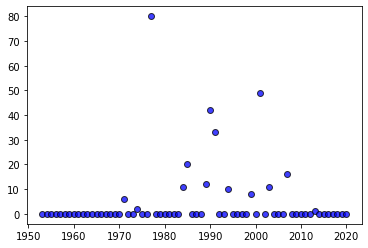

In [32]:
year = inc_reset_df["fyDeclared"]

freezing  = inc_reset_df["Freezing"]
plt.scatter(year, freezing, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

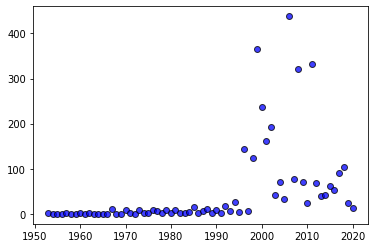

In [34]:
year = inc_reset_df["fyDeclared"]

fire  = inc_reset_df["Fire"]
plt.scatter(year, fire, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

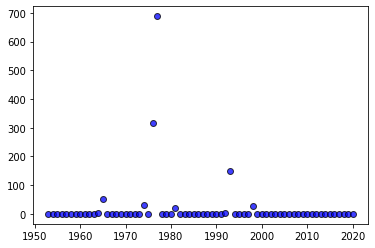

In [35]:
year = inc_reset_df["fyDeclared"]

drought  = inc_reset_df["Drought"]
plt.scatter(year, drought, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

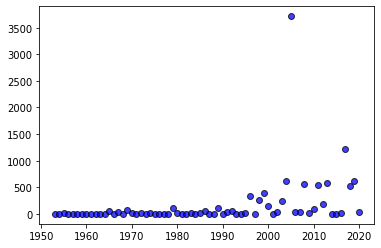

In [37]:
year = inc_reset_df["fyDeclared"]

hurr  = inc_reset_df["Hurricane"]
plt.scatter(year, hurr, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

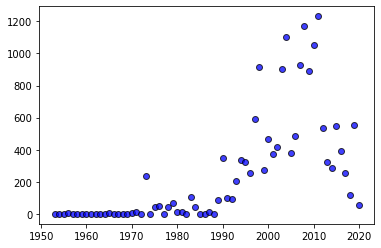

In [39]:
year = inc_reset_df["fyDeclared"]

sstorm  = inc_reset_df["Severe Storm(s)"]
plt.scatter(year, sstorm, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)